### Task 2: Quantitative Analysis of Stock Prices
This notebook performs EDA on stock price data, calculates technical indicators using TA-Lib, and prepares data for correlation analysis with news sentiment.


In [2]:
import sys
from pathlib import Path

# Add project root and src/ folder to Python path
project_root = Path("..").resolve()
src_path = project_root / "src"

sys.path.append(str(project_root))
sys.path.append(str(src_path))

In [3]:
import pandas as pd
from pathlib import Path
import pynance as pn 
import matplotlib.pyplot as plt
import talib as ta

# Custom modules
from fns_project.features.indicators import compute_all_indicators
from fns_project.data.loader import load_price_csv
from fns_project.viz.plots import plot_price_with_indicators
from fns_project.config import RAW_DIR, PROCESSED_DIR, DEFAULTS
from fns_project.data.loader import load_price_csv

from fns_project.config import RAW_DIR, PROCESSED_DIR, DEFAULTS
from fns_project.data.loader import load_price_csv



2025-11-23 23:09:31,551 INFO TA-Lib loaded successfully.


In [7]:
# 2. Load stock price data
TICKER = "NVDA"  # Example ticker symbol
price_file = RAW_DIR / f"price/{TICKER}.csv"  # use RAW_DIR from config
df_price = load_price_csv(price_file, date_col="Date",
                          tz=DEFAULTS["market_tz"])

df_price.tail(5)

2025-11-23 23:11:16,389 INFO Loaded prices: 3774 rows from D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\data\raw\price\NVDA.csv


,date,Close,High,Low,Open,Volume
3769,2023-12-21 19:00:00-05:00,48.805527,49.358247,48.442706,49.170342,252507000
3770,2023-12-25 19:00:00-05:00,49.254299,49.575137,48.935459,48.943454,244200000
3771,2023-12-26 19:00:00-05:00,49.392231,49.655100,49.060397,49.486186,233648000
3772,2023-12-27 19:00:00-05:00,49.497185,49.859003,49.387239,49.618126,246587000
3773,2023-12-28 19:00:00-05:00,49.497185,49.971949,48.726571,49.788039,389293000


In [5]:
# Compute SMA20, EMA20, RSI14, MACD
df_ind = compute_all_indicators(df_price)

# Preview last 5 rows to verify
df_ind.tail(5)

,date,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_upper,BB_middle,BB_lower,ATR_14,STOCH_K,STOCH_D
3769,2023-12-21 19:00:00-05:00,48.805527,49.358247,48.442706,49.170342,252507000,47.706983,48.024644,55.352119,0.634352,0.564438,0.069914,50.152737,47.706983,45.261229,1.345990,66.523455,72.255253
3770,2023-12-25 19:00:00-05:00,49.254299,49.575137,48.935459,48.943454,244200000,47.759019,48.141754,57.245971,0.655689,0.582688,0.073001,50.288523,47.759019,45.229515,1.304820,73.124431,70.476924
3771,2023-12-26 19:00:00-05:00,49.392231,49.655100,49.060397,49.486186,233648000,47.838989,48.260847,57.837928,0.675937,0.601338,0.074599,50.466927,47.838989,45.211051,1.254098,74.974397,71.540761
3772,2023-12-27 19:00:00-05:00,49.497185,49.859003,49.387239,49.618126,246587000,47.908266,48.378593,58.310919,0.692470,0.619564,0.072906,50.632585,47.908266,45.183947,1.198217,78.728573,75.609134
3773,2023-12-28 19:00:00-05:00,49.497185,49.971949,48.726571,49.788039,389293000,48.046003,48.485126,58.310919,0.697532,0.635158,0.062374,50.799025,48.046003,45.292980,1.201585,79.792641,77.831870


              count          mean           std           min           25%  \
Close        3774.0  6.796822e+00  1.065975e+01  1.652686e-01  3.573966e-01   
High         3774.0  6.915713e+00  1.084353e+01  1.712284e-01  3.624222e-01   
Low          3774.0  6.666721e+00  1.046139e+01  1.622887e-01  3.517434e-01   
Open         3774.0  6.793541e+00  1.065914e+01  1.652686e-01  3.570170e-01   
Volume       3774.0  5.230753e+08  3.205760e+08  4.564400e+07  3.188510e+08   
SMA_20       3755.0  6.707341e+00  1.044679e+01  1.833656e-01  3.592328e-01   
EMA_20       3755.0  6.708080e+00  1.043732e+01  1.847066e-01  3.580823e-01   
RSI_14       3760.0  5.452072e+01  1.248934e+01  1.889075e+01  4.560961e+01   
MACD         3741.0  8.881521e-02  4.453874e-01 -1.790507e+00 -4.459059e-03   
MACD_signal  3741.0  8.814200e-02  4.216559e-01 -1.536606e+00 -3.648898e-03   
MACD_hist    3741.0  6.732107e-04  1.273211e-01 -7.252492e-01 -4.904254e-03   
BB_upper     3755.0  7.393380e+00  1.151892e+01  2.0

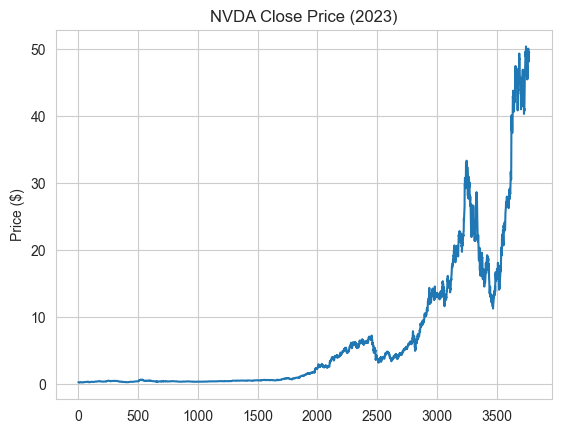

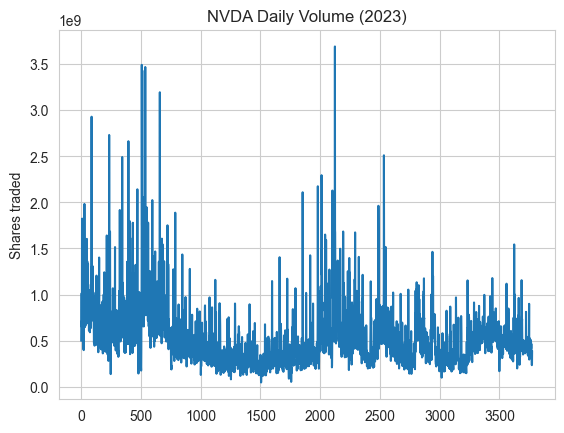

In [8]:
print(df_ind.describe().T)

# Close price chart
df_ind["Close"].plot(title=f"{TICKER} Close Price (2023)")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
df_ind["Volume"].plot(title=f"{TICKER} Daily Volume (2023)")
plt.ylabel("Shares traded")
plt.show()

In [9]:
import numpy as np

# daily returns
df_price["daily_return"] = df_price["Close"].pct_change()

# annualized volatility
vol_annual = df_price["daily_return"].std() * np.sqrt(252)

# annualized Sharpe ratio assuming risk-free = 0
sharpe = (df_price["daily_return"].mean() /
          df_price["daily_return"].std()) * np.sqrt(252)

metrics_df = df_price.copy()
metrics_df["sharpe_ratio"] = sharpe
metrics_df["volatility_annualized"] = vol_annual

metrics_df.tail()

,date,Close,High,Low,Open,Volume,daily_return,sharpe_ratio,volatility_annualized
3769,2023-12-21 19:00:00-05:00,48.805527,49.358247,48.442706,49.170342,252507000,-0.003266,1.030366,0.459048
3770,2023-12-25 19:00:00-05:00,49.254299,49.575137,48.935459,48.943454,244200000,0.009195,1.030366,0.459048
3771,2023-12-26 19:00:00-05:00,49.392231,49.655100,49.060397,49.486186,233648000,0.002800,1.030366,0.459048
3772,2023-12-27 19:00:00-05:00,49.497185,49.859003,49.387239,49.618126,246587000,0.002125,1.030366,0.459048
3773,2023-12-28 19:00:00-05:00,49.497185,49.971949,48.726571,49.788039,389293000,0.000000,1.030366,0.459048


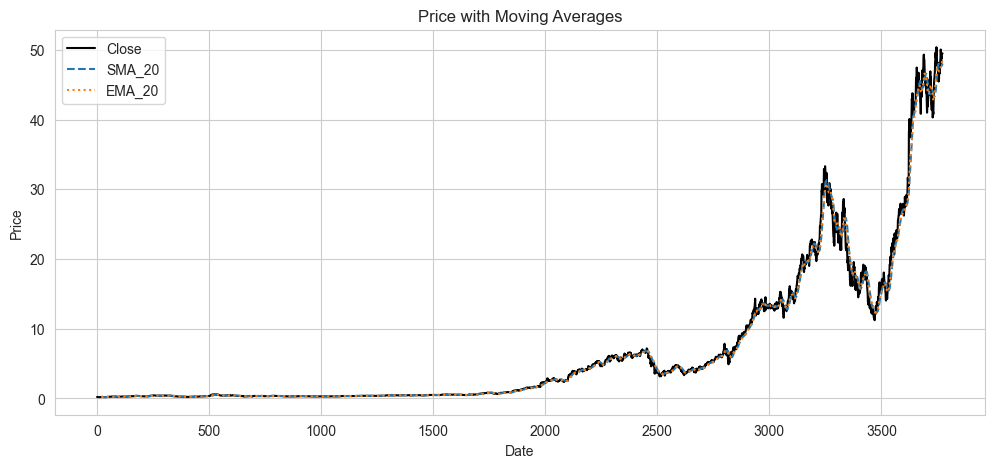

In [10]:
plot_price_with_indicators(
    df_ind,
    close_col="Close",
    sma_col="SMA_20",
    ema_col="EMA_20",
)

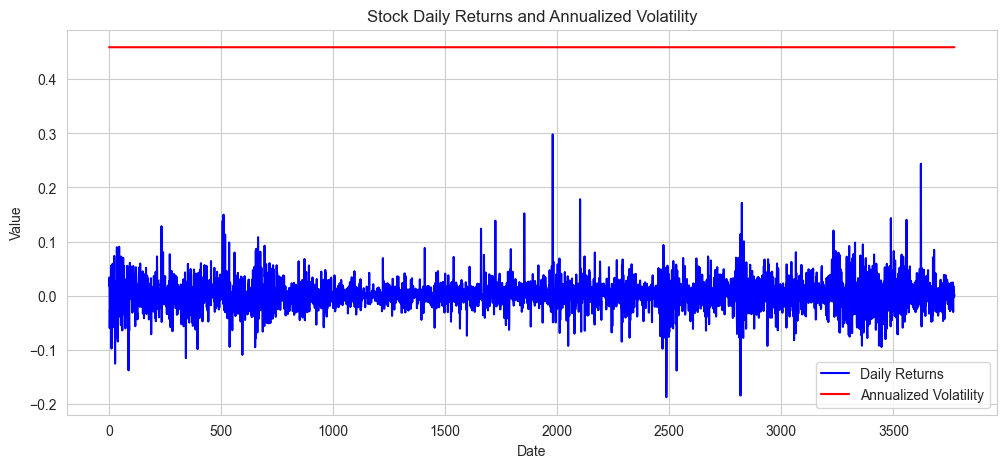

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(metrics_df.index,
         metrics_df["daily_return"], label="Daily Returns", color="blue")
plt.plot(metrics_df.index, metrics_df["volatility_annualized"],
         label="Annualized Volatility", color="red")
plt.title("Stock Daily Returns and Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

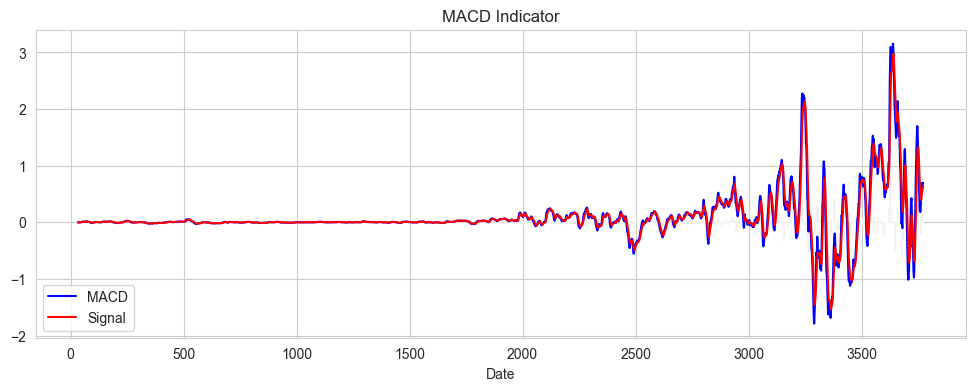

In [12]:
# 7. MACD
macd, macdsignal, macdhist = ta.MACD(
df_ind['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df_ind['MACD'] = macd
df_ind['MACD_signal'] = macdsignal
df_ind['MACD_hist'] = macdhist

plt.figure(figsize=(12, 4))
plt.plot(df_ind.index, df_ind['MACD'], label='MACD', color='blue')
plt.plot(df_ind.index, df_ind['MACD_signal'],
         label='Signal', color='red')
plt.bar(df_ind.index, df_ind['MACD_hist'], color='gray', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.legend()
plt.show()

In [13]:
# 9. Save processed features
processed_file = PROCESSED_DIR / f"price/{TICKER}_features.csv"
df_ind.to_csv(processed_file, index=False)
print(f"Saved processed price features to: {processed_file}")

Saved processed price features to: D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\data\processed\price\NVDA_features.csv
